<a href="https://colab.research.google.com/github/Apple03244/Colaboratory/blob/main/%EB%8B%A4%EC%A4%91%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import google.colab as colab

In [137]:
module=colab.files

In [138]:
#file_data=module.upload()

In [139]:
import pandas as pd
data=pd.read_csv('/content/train.csv')

In [140]:
use_data=data.dropna(axis=0)
use_data["일시"]=pd.to_datetime(use_data["일시"])

<ipython-input-140-089be084eef0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  use_data["일시"]=pd.to_datetime(use_data["일시"])


In [141]:
target='평균기온'

## 1. 회귀를 위한 다중퍼셉트론(사이킷런)

In [142]:
import sklearn.neural_network as skneu
import sklearn.preprocessing as skpre
import sklearn.model_selection as skmod
import numpy as np
np.random.seed(10)
import sklearn.pipeline as skpip

In [143]:
mlp_model=skneu.MLPRegressor(hidden_layer_sizes=(50,50,50),random_state=10)
mlp_reg=skpip.make_pipeline(skpre.StandardScaler(),mlp_model)

In [144]:
train_data=use_data[use_data["일시"].apply(lambda x:x.year)<=2020]
test_data=use_data[use_data["일시"].apply(lambda x:x.year)>2020]

In [145]:
mlp_reg.fit(X=train_data[train_data.columns.difference(["일시",target])],y=train_data[target])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              random_state=10))])

In [146]:
import sklearn.metrics as skmet
pred_y=mlp_reg.predict(X=test_data[test_data.columns.difference(["일시",target])])
skmet.mean_squared_error(y_true=test_data[target],y_pred=pred_y,squared=False)

0.5648677372050859

## 2. 케라스를 이용한 다중 퍼셉트론

In [147]:
import tensorflow as ts

In [148]:
# 랜덤시드 고정
ts.random.set_seed(10)

### step 1. 모델 생성

In [149]:
train_data[train_data.columns.difference(["일시",target])].shape[1:]

(9,)

In [150]:
nomal_layer=ts.keras.layers.Normalization(input_shape=train_data[train_data.columns.difference(["일시",target])].shape[1:])
model=ts.keras.Sequential() # 간단한 Sequential 모델을 만들거라 선언
#model.add(ts.keras.layers.Input(shape=(9,))) # input shape 는 초기 데이터 형태
#ts.keras.Flatten 은 이미지를 1차원으로 전처리 해주는 충
model.add(nomal_layer)
model.add(ts.keras.layers.Dense(300,activation='sigmoid'))
model.add(ts.keras.layers.Dense(100,activation='sigmoid'))
model.add(ts.keras.layers.Dense(10,activation="sigmoid"))
model.add(ts.keras.layers.Dense(1,activation="tanh"))

In [151]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 9)                19        
 ion)                                                            
                                                                 
 dense_30 (Dense)            (None, 300)               3000      
                                                                 
 dense_31 (Dense)            (None, 100)               30100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
 dense_33 (Dense)            (None, 1)                 11        
                                                                 
Total params: 34,140
Trainable params: 34,121
Non-trainable params: 19
________________________________________________

In [152]:
model.layers

### step 2. 모델 컴파일(평가기준)

In [153]:
model.compile(optimizer=ts.keras.optimizers.SGD(learning_rate=1e-3),
              loss=ts.keras.metrics.mean_squared_error,
              metrics=["mae"]) #Adam은 역전파 알고리즘의 변형

### step 3. 모델 훈련 및 평가

In [154]:
train_feature=train_data.columns.difference(["일시",target])
train_history=model.fit(x=train_data[train_feature],y=train_data[target]
                        ,epochs=30,validation_split=0.1) #이처럼 검증에 수치를 넣으면 받은 데이터의 끝부터 해당 %만큼을 검증데이터로 사용한다
          #epochs=30,validation_data=[test_data[train_feature],test_data[target]]) #이처럼 검증데이터를 직접주는것도 가능하다

Epoch 1/30
191/191 [==============================] - 1s 4ms/step - loss: 268.7175 - mae: 14.0180 - val_loss: 311.5430 - val_mae: 15.1991
Epoch 2/30
191/191 [==============================] - 1s 3ms/step - loss: 267.5354 - mae: 13.9841 - val_loss: 311.4241 - val_mae: 15.1958
Epoch 3/30
191/191 [==============================] - 1s 4ms/step - loss: 267.4743 - mae: 13.9824 - val_loss: 311.3846 - val_mae: 15.1947
Epoch 4/30
191/191 [==============================] - 1s 4ms/step - loss: 267.4494 - mae: 13.9816 - val_loss: 311.3649 - val_mae: 15.1942
Epoch 5/30
191/191 [==============================] - 1s 5ms/step - loss: 267.4360 - mae: 13.9813 - val_loss: 311.3531 - val_mae: 15.1939
Epoch 6/30
191/191 [==============================] - 1s 5ms/step - loss: 267.4273 - mae: 13.9810 - val_loss: 311.3454 - val_mae: 15.1937
Epoch 7/30
191/191 [==============================] - 1s 3ms/step - loss: 267.4215 - mae: 13.9808 - val_loss: 311.3398 - val_mae: 15.1935
Epoch 8/30
191/191 [==============

### step 4. 평가를 위한 시각화

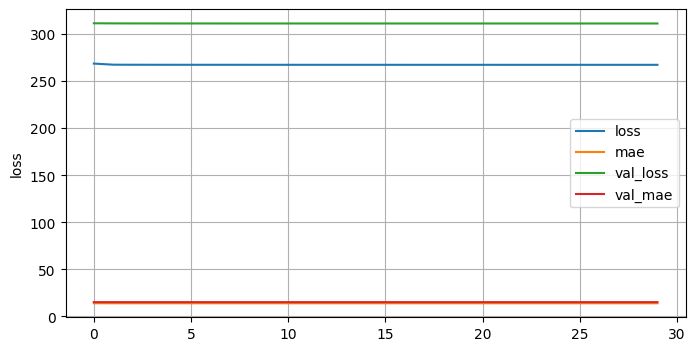

In [155]:
import matplotlib.pyplot as plt
import seaborn as sb
history_data=pd.DataFrame(train_history.history)
plt.figure(figsize=(8,4))
for col in history_data.columns:
  sb.lineplot(x=history_data.index,y=history_data[col],label=col)
plt.grid()
plt.show()

굉장히 안좋은 모델이지만 뒤에서 파라미터 튜닝을 배우며 모델을 성장시켜보자